In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers

import warnings 
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [2]:
folder=r"C:\Users\scoot\Downloads\archive (1)\cell_images\cell_images"

In [3]:
tf.keras.utils.image_dataset_from_directory??

In [4]:
data=tf.keras.utils.image_dataset_from_directory(folder,image_size=(40,40),class_names=["Parasitized","Uninfected"],batch_size=200)

Found 27558 files belonging to 2 classes.


In [5]:
type(data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [6]:
data_iterator=data.as_numpy_iterator()

In [7]:
batch=data_iterator.next()[0].max()

In [8]:
batch

250.41747

In [9]:
data=data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
data.as_numpy_iterator().next()[0].max()

0.994706

# splitting of our data 

In [11]:
len(data)

138

In [12]:
138*200

27600

In [13]:
train_size=100
val_size=20
test_size=18


In [14]:
train_size,val_size,test_size

(100, 20, 18)

In [15]:
train=data.take(train_size)
test=data.skip(train_size).take(test_size)
val=data.skip(test_size+train_size).take(val_size)


In [16]:
input_shape=(40,40,3)

# vgg net

In [17]:
from tensorflow.keras.applications.vgg16  import  VGG16

In [18]:
model1=VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=input_shape



)

In [19]:
model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 40, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 40, 40, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 40, 40, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 20, 20, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 20, 20, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 20, 20, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 10, 10, 128)       0     

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [21]:
vggnet=Sequential()

vggnet.add(model1)
vggnet.add(Flatten())
vggnet.add(Dense(10,activation="relu"))
vggnet.add(Dense(6,activation="sigmoid"))

In [22]:
vggnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
Total params: 14,719,884
Trainable params: 14,719,884
Non-trainable params: 0
_________________________________________________________________


In [23]:
model1.trainable=False

In [24]:
vggnet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history=vggnet.fit(train,validation_data=val,epochs=10)

Epoch 1/10
100/100 [==============================] - 324s 3s/step - loss: 0.7807 - accuracy: 0.7028 - val_loss: 0.4944 - val_accuracy: 0.7913
Epoch 2/10
100/100 [==============================] - 326s 3s/step - loss: 0.4428 - accuracy: 0.8155 - val_loss: 0.4045 - val_accuracy: 0.8322
Epoch 3/10
100/100 [==============================] - 340s 3s/step - loss: 0.3839 - accuracy: 0.8369 - val_loss: 0.3673 - val_accuracy: 0.8474
Epoch 4/10
100/100 [==============================] - 370s 4s/step - loss: 0.3578 - accuracy: 0.8466 - val_loss: 0.3490 - val_accuracy: 0.8557
Epoch 5/10
100/100 [==============================] - 308s 3s/step - loss: 0.3430 - accuracy: 0.8528 - val_loss: 0.3475 - val_accuracy: 0.8550
Epoch 6/10
100/100 [==============================] - 275s 3s/step - loss: 0.3348 - accuracy: 0.8561 - val_loss: 0.3325 - val_accuracy: 0.8623
Epoch 7/10
100/100 [==============================] - 285s 3s/step - loss: 0.3278 - accuracy: 0.8575 - val_loss: 0.3282 - val_accuracy: 0.8631

In [29]:
EPOCHS=10

In [30]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

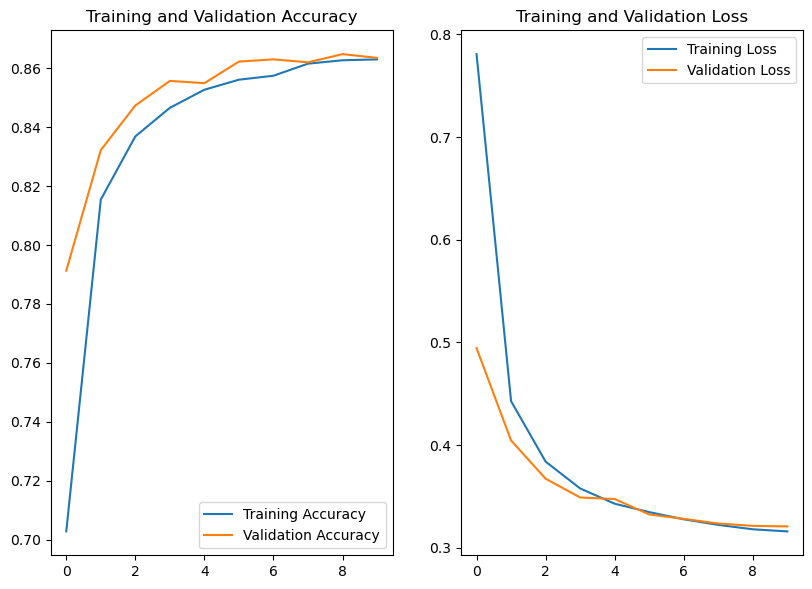

In [31]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [32]:
vggnet.evaluate(test)

18/18 [==============================] - 59s 2s/step - loss: 0.3245 - accuracy: 0.8567


[0.32450851798057556, 0.8566666841506958]

# Resnet model

In [33]:
from tensorflow.keras.applications.resnet50  import ResNet50

In [34]:
model2=ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=input_shape



)

In [35]:
resnet=Sequential()

resnet.add(model2)
resnet.add(Flatten())
resnet.add(Dense(10,activation="relu"))
resnet.add(Dense(6,activation="sigmoid"))

In [36]:
resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                81930     
                                                                 
 dense_3 (Dense)             (None, 6)                 66        
                                                                 
Total params: 23,669,708
Trainable params: 23,616,588
Non-trainable params: 53,120
_________________________________________________________________


In [37]:
model2.trainable=False

In [38]:
resnet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
history=resnet.fit(train,validation_data=val,epochs=10)

Epoch 1/10
100/100 [==============================] - 174s 2s/step - loss: 0.7769 - accuracy: 0.5944 - val_loss: 0.6446 - val_accuracy: 0.6523
Epoch 2/10
100/100 [==============================] - 150s 1s/step - loss: 0.6292 - accuracy: 0.6586 - val_loss: 0.6202 - val_accuracy: 0.6700
Epoch 3/10
100/100 [==============================] - 149s 1s/step - loss: 0.6182 - accuracy: 0.6648 - val_loss: 0.6131 - val_accuracy: 0.6789
Epoch 4/10
100/100 [==============================] - 150s 1s/step - loss: 0.6138 - accuracy: 0.6680 - val_loss: 0.6073 - val_accuracy: 0.6812
Epoch 5/10
100/100 [==============================] - 150s 1s/step - loss: 0.6068 - accuracy: 0.6789 - val_loss: 0.6111 - val_accuracy: 0.6713
Epoch 6/10
100/100 [==============================] - 154s 2s/step - loss: 0.6013 - accuracy: 0.6827 - val_loss: 0.5982 - val_accuracy: 0.6938
Epoch 7/10
100/100 [==============================] - 150s 1s/step - loss: 0.6018 - accuracy: 0.6808 - val_loss: 0.5976 - val_accuracy: 0.6875

In [40]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

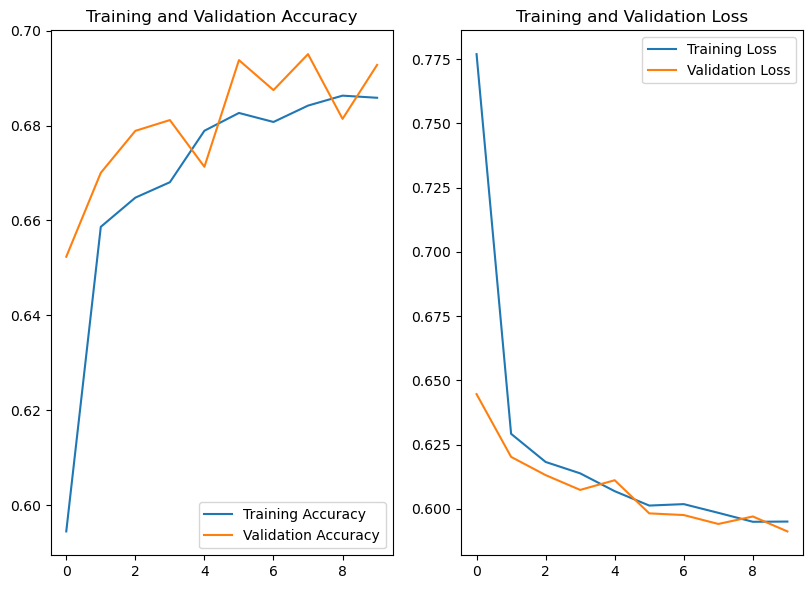

In [41]:

plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [42]:
resnet.evaluate(test)

18/18 [==============================] - 31s 1s/step - loss: 0.5873 - accuracy: 0.6983


[0.5872561931610107, 0.6983333230018616]

In [43]:
import cv2

In [44]:
def predict_malaria(img):
    image=cv2.imread(img)
    resize=tf.image.resize(image,(40,40))
    scale=np.expand_dims(resize/255,0)
    pred=model.predict(scale)
    return pred
    
    
    
    